# 3.3 Analiza napovedanih aktivnih struktur

In [1]:
%run __A_knjiznice.py

# Import specific elements from the script
from __A_knjiznice import *
from __B_funkcije import *
import __C_konstante as kon

## Molekule modela RF

In [2]:
best_molecules_rf = pd.read_csv(f'{kon.path_files}/podatki_napoved/most_active_filtered.csv')
molecules_rf = best_molecules_rf[['Smiles', 'Predicted_Activity', 'Probability_Active']]
molecules_rf

,Smiles,Predicted_Activity,Probability_Active
0,NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.965726
1,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.963312
2,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,1,0.953737
3,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,1,0.953737
4,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.953737
...,...,...,...
1960,CC(C)CCn1c(nc2ccccc12)N1CCC(CC1)C(=O)Nc1ccc(F)cc1,1,0.799842
1961,COC(=O)C1CCN(CC1)\C=C(/C#N)C(=O)Nc1ccc(F)cc1,1,0.799819
1962,Fc1ccc(NC(=O)OC2CCCC(C2)NC(=O)c2ccc(Br)o2)cc1,1,0.799786
1963,CN(C)CCNC(=O)c1cccc2N(CCc12)C(=O)Nc1ccc(F)cc1,1,0.799783


In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

molecules_analysis_rf = molecules_rf.copy()

# Define the function to calculate specific property
def calc_property(smiles, param):
    mol = Chem.MolFromSmiles(smiles)
    if mol:  # Check if molecule was successfully created
        if param == 'Molekulska_masa':
            return Descriptors.MolWt(mol)  # Molecular Weight
        elif param == 'logP':
            return Descriptors.MolLogP(mol)  # LogP
        elif param == 'Število_O_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')  # Oxygen count
        elif param == 'Število_N_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')  # Nitrogen count
        elif param == 'Akceptorji_H_vezi':
            return rdMolDescriptors.CalcNumHBA(mol)  # Hydrogen Bond Acceptors
        elif param == 'Donorji_H_vezi':
            return rdMolDescriptors.CalcNumHBD(mol)  # Hydrogen Bond Donors
        elif param == 'Število_aromatskih_obročev':
            return rdMolDescriptors.CalcNumAromaticRings(mol)  # Aromatic Rings
        elif param == 'TPSA':
            return rdMolDescriptors.CalcTPSA(mol)  # Topological Polar Surface Area
        elif param == 'Število_rotirajočih_vezi':
            return Descriptors.NumRotatableBonds(mol)  # Number of Rotatable 
        else:
            return None  # Return None for unsupported params
    else:
        return None  # Return None if the molecule is invalid

# Example: Assuming 'molecules' is your DataFrame with 'smiles' column
# molecules = pd.read_csv('your_file.csv')  # If you're loading the data

# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis_rf[prop] = molecules_analysis_rf['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis_rf

,Smiles,Predicted_Activity,Probability_Active,Molekulska_masa,logP,Število_O_atomov,Število_N_atomov,Akceptorji_H_vezi,Donorji_H_vezi,Število_aromatskih_obročev,TPSA,Število_rotirajočih_vezi
0,NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.965726,359.159,1.58970,2,6,7,4,2,121.59,5
1,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.963312,410.920,6.11960,1,2,2,1,3,41.99,4
2,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,1,0.953737,438.239,0.42410,4,7,8,5,2,167.76,7
3,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,1,0.953737,438.239,0.42410,4,7,8,5,2,167.76,7
4,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.953737,438.239,0.42410,4,7,8,5,2,167.76,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1960,CC(C)CCn1c(nc2ccccc12)N1CCC(CC1)C(=O)Nc1ccc(F)cc1,1,0.799842,408.521,5.07660,1,4,4,1,3,50.16,6
1961,COC(=O)C1CCN(CC1)\C=C(/C#N)C(=O)Nc1ccc(F)cc1,1,0.799819,331.347,2.05668,3,3,5,1,1,82.43,4
1962,Fc1ccc(NC(=O)OC2CCCC(C2)NC(=O)c2ccc(Br)o2)cc1,1,0.799786,425.254,4.47090,4,2,4,2,2,80.57,4
1963,CN(C)CCNC(=O)c1cccc2N(CCc12)C(=O)Nc1ccc(F)cc1,1,0.799783,370.428,2.71170,2,4,3,2,2,64.68,5


In [4]:
MW_stats = molecules_analysis_rf['Molekulska_masa'].describe()
logP_stats = molecules_analysis_rf['logP'].describe()
Aromatic_Rings_stats = molecules_analysis_rf['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis_rf['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis_rf['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis_rf['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis_rf['Število_N_atomov'].describe()

# Create a DataFrame to hold the statistics
stats_df_rf = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
})

# Transpose the DataFrame to have the statistics as rows
stats_df_rf = stats_df_rf.transpose()
stats_df_rf

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,1965.0,408.665349,71.795841,179.1940,363.4360,410.4700,451.45500,667.5440
logP,1965.0,3.742037,1.141600,-0.0355,3.0176,3.7611,4.49952,7.8301
Število_aromatskih_obročev,1965.0,2.296183,0.766410,1.0000,2.0000,2.0000,3.00000,5.0000
Akceptorji_H_vezi,1965.0,4.051399,1.437746,1.0000,3.0000,4.0000,5.00000,11.0000
Donorji_H_vezi,1965.0,1.419338,0.628768,1.0000,1.0000,1.0000,2.00000,5.0000
Število_O_atomov,1965.0,2.443766,1.079110,1.0000,2.0000,2.0000,3.00000,7.0000
Število_N_atomov,1965.0,3.422901,1.200723,1.0000,2.0000,3.0000,4.00000,8.0000


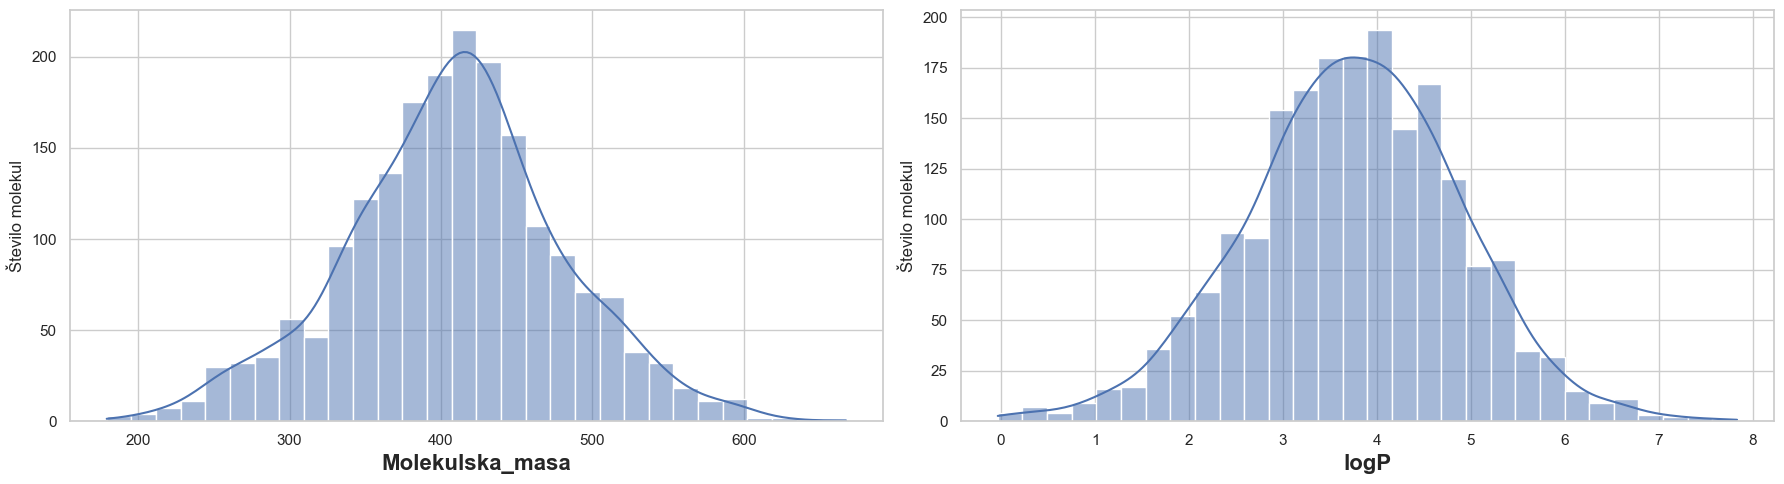

In [5]:
continuous_properties = ['Molekulska_masa', 'logP']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis_rf[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

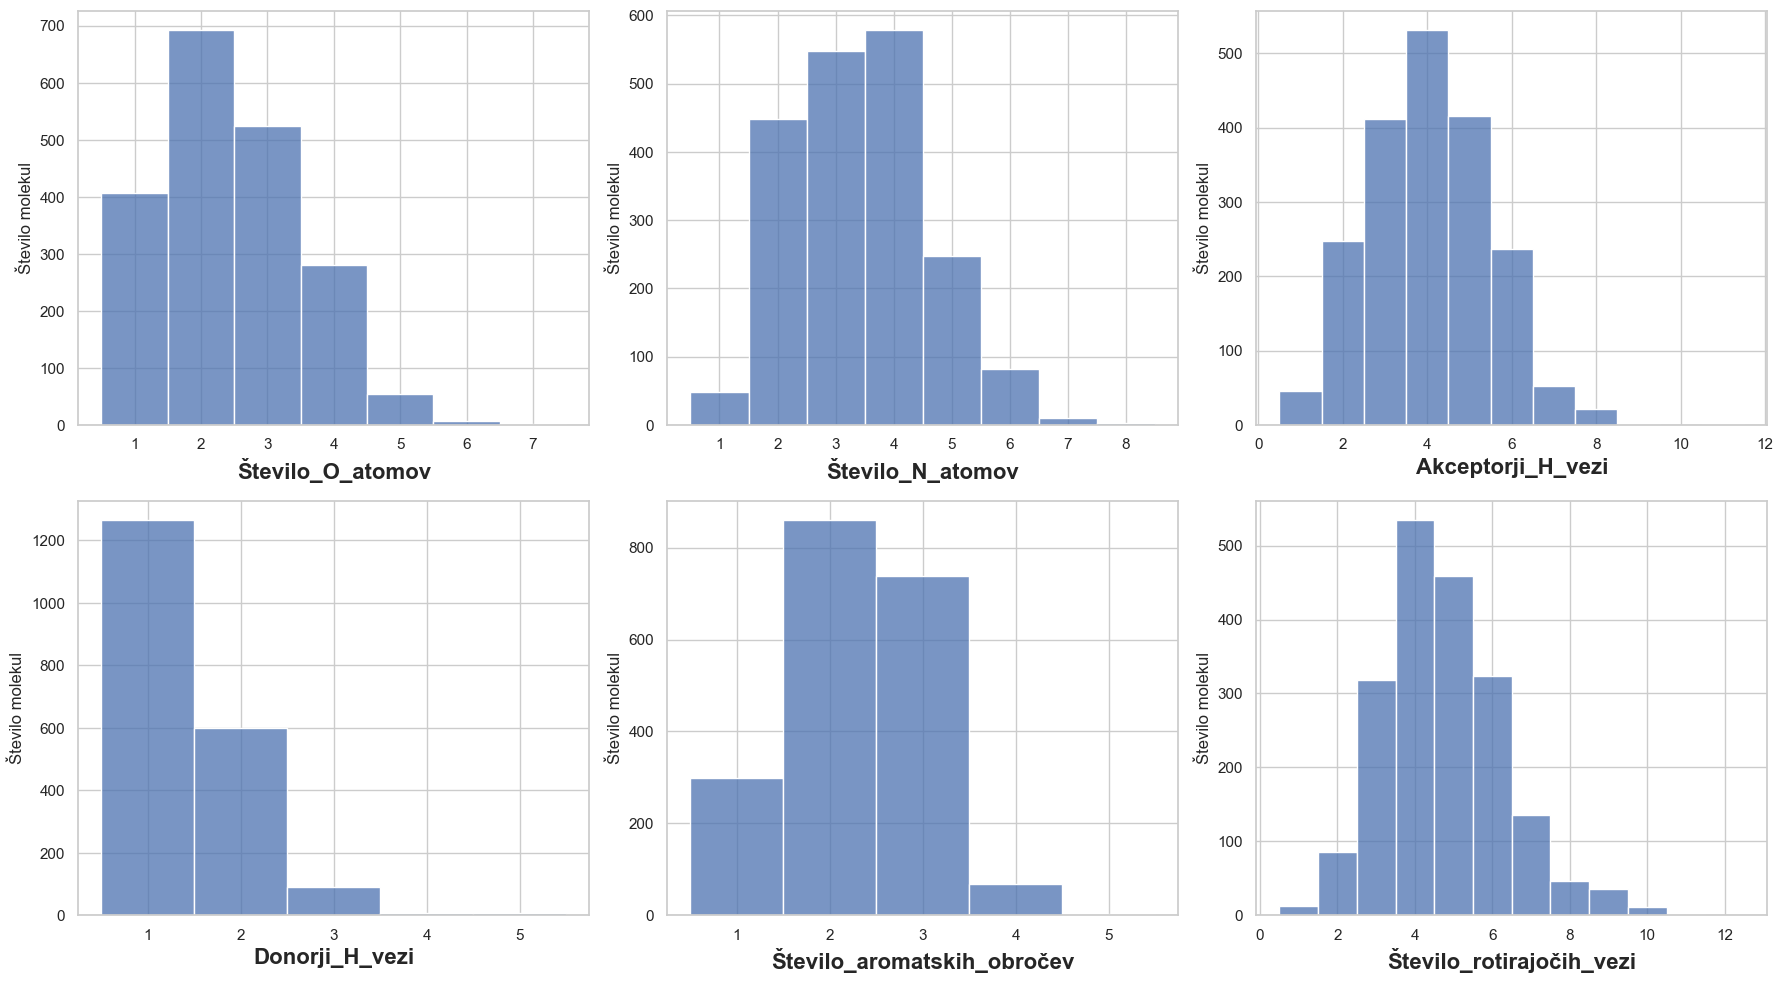

In [6]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis_rf[prop].dropna(), bins=molecules_analysis_rf[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

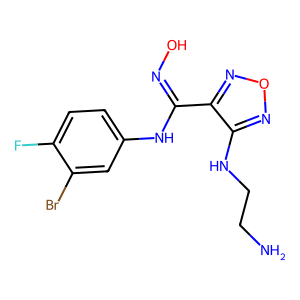

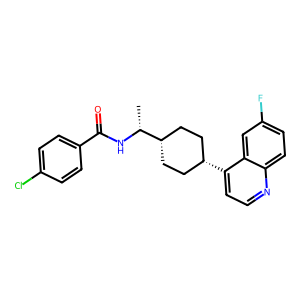

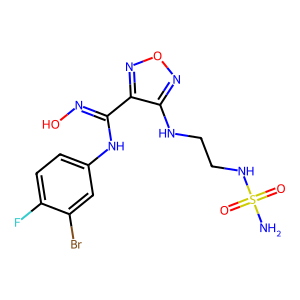

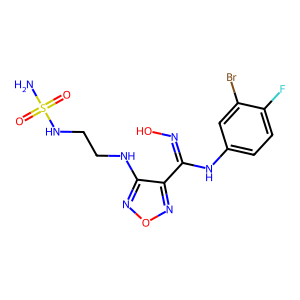

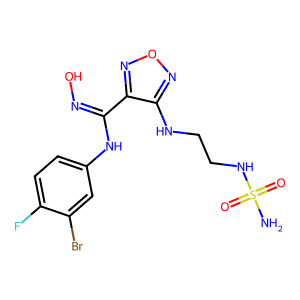

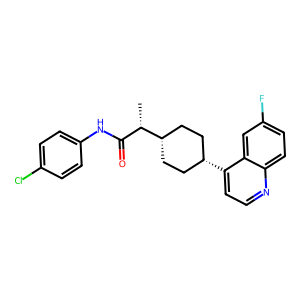

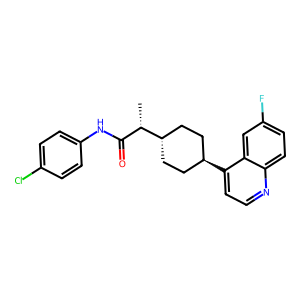

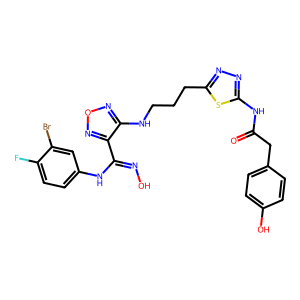

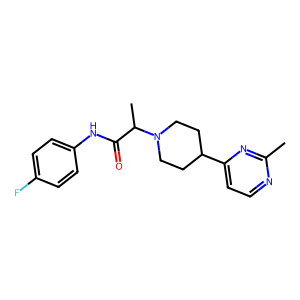

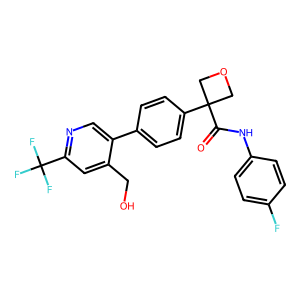

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import display, HTML

# Sample DataFrame (replace this with your actual DataFrame)
# molecules_rf = pd.DataFrame(...)

# Assuming 'molecules_rf' is already sorted by 'Predicted_Activity' and you want the top 5
top_active_molecules_rf = molecules_rf.head(10)

# Generate 2D structures and visualize them
molecule_images = []
for index, row in top_active_molecules_rf.iterrows():
    smiles = row['Smiles']
    
    # Convert SMILES to a molecule
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if the molecule is valid
    if mol is not None:
        # Draw the molecule in 2D and append to the list
        img = Draw.MolToImage(mol)
        molecule_images.append((img, smiles))  # Store the image and SMILES as a tuple
    else:
        print(f"Invalid SMILES: {smiles}")

# Display all images in the notebook with SMILES
for img, smiles in molecule_images:
    display(img)
    display(HTML(f"<h4>SMILES: {smiles}</h4>"))  # Display the SMILES below the image

## Molekule modela SVM

In [8]:
best_molecules_svm = pd.read_csv(f'{kon.path_files}/podatki_napoved/most_active_filtered_svm.csv')
molecules_svm = best_molecules_svm[['Smiles', 'Predicted_Activity', 'Probability_Active']]
molecules_svm

,Smiles,Predicted_Activity,Probability_Active
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.975293
1,C[C@@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(...,1,0.964400
2,C[C@@H](NC(=O)c1ccc(F)cc1)c1ccc2N(CCc2c1)C(=O)...,1,0.963078
3,CC(C)CN(CC(C)C)c1ccc(cc1NC(=O)Nc1ccc(C)cc1)-c1...,1,0.959935
4,C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(...,1,0.956517
...,...,...,...
1857,Cl.CC(C)c1ccc(cc1)-n1ncc(C(=O)Nc2ccc(F)c(c2)[N...,1,0.852980
1858,CN(C1CCCCC1)S(=O)(=O)c1ccc(cc1)C(=O)Nc1nc-2c(C...,1,0.852979
1859,CC1CCc2nc(NC(=O)c3cccc(NS(=O)(=O)c4ccc(F)cc4)c...,1,0.852957
1860,CC(C)NC(=O)C[C@@H]1c2nc(NC(=O)c3cccc(F)c3)sc2C...,1,0.852888


In [9]:
# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

molecules_analysis_svm = molecules_svm.copy()

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis_svm[prop] = molecules_analysis_svm['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis_svm

,Smiles,Predicted_Activity,Probability_Active,Molekulska_masa,logP,Število_O_atomov,Število_N_atomov,Akceptorji_H_vezi,Donorji_H_vezi,Število_aromatskih_obročev,TPSA,Število_rotirajočih_vezi
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.975293,410.920,6.11960,1,2,2,1,3,41.99,4
1,C[C@@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(...,1,0.964400,410.920,6.57590,1,2,2,1,3,41.99,4
2,C[C@@H](NC(=O)c1ccc(F)cc1)c1ccc2N(CCc2c1)C(=O)...,1,0.963078,396.462,3.63240,3,2,3,1,2,58.64,4
3,CC(C)CN(CC(C)C)c1ccc(cc1NC(=O)Nc1ccc(C)cc1)-c1...,1,0.959935,497.647,6.60452,1,7,5,3,4,98.83,9
4,C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(...,1,0.956517,410.920,6.57590,1,2,2,1,3,41.99,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1857,Cl.CC(C)c1ccc(cc1)-n1ncc(C(=O)Nc2ccc(F)c(c2)[N...,1,0.852980,487.963,5.18410,3,5,6,2,3,102.09,6
1858,CN(C1CCCCC1)S(=O)(=O)c1ccc(cc1)C(=O)Nc1nc-2c(C...,1,0.852979,483.615,4.90800,4,3,6,1,3,88.60,5
1859,CC1CCc2nc(NC(=O)c3cccc(NS(=O)(=O)c4ccc(F)cc4)c...,1,0.852957,445.541,4.46010,3,3,5,2,3,88.16,5
1860,CC(C)NC(=O)C[C@@H]1c2nc(NC(=O)c3cccc(F)c3)sc2C...,1,0.852888,503.640,3.86470,4,3,6,4,2,111.55,6


In [10]:
MW_stats = molecules_analysis_svm['Molekulska_masa'].describe()
logP_stats = molecules_analysis_svm['logP'].describe()
Aromatic_Rings_stats = molecules_analysis_svm['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis_svm['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis_svm['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis_svm['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis_svm['Število_N_atomov'].describe()

# Create a DataFrame to hold the statistics
stats_df_svm = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
})

# Transpose the DataFrame to have the statistics as rows
stats_df_svm = stats_df_svm.transpose()
stats_df_svm

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,1862.0,424.824151,60.867778,236.246,382.4390,422.4715,464.84950,673.73600
logP,1862.0,3.947302,1.075503,0.211,3.3158,3.9665,4.62319,7.43342
Število_aromatskih_obročev,1862.0,2.431257,0.685578,1.000,2.0000,2.0000,3.00000,5.00000
Akceptorji_H_vezi,1862.0,4.245435,1.428360,1.000,3.0000,4.0000,5.00000,11.00000
Donorji_H_vezi,1862.0,1.546187,0.699861,0.000,1.0000,1.0000,2.00000,6.00000
Število_O_atomov,1862.0,2.558002,1.063092,0.000,2.0000,3.0000,3.00000,7.00000
Število_N_atomov,1862.0,3.494629,1.193176,1.000,3.0000,3.0000,4.00000,10.00000


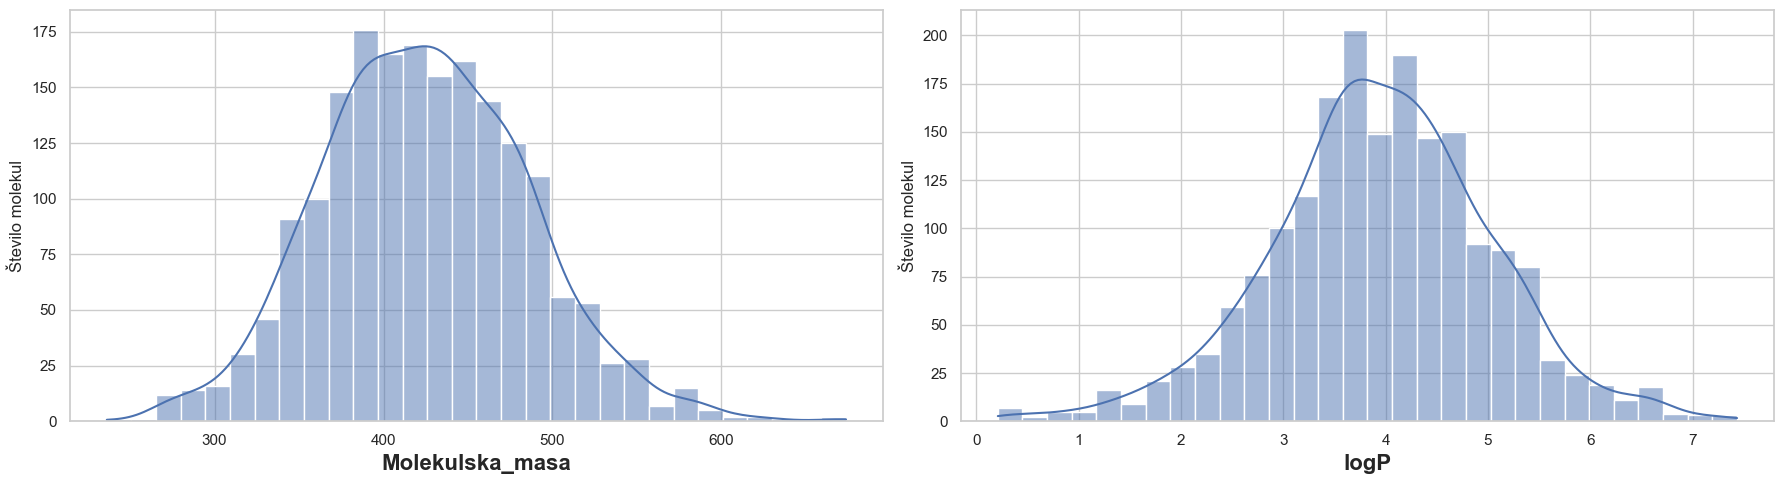

In [11]:
continuous_properties = ['Molekulska_masa', 'logP']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis_svm[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

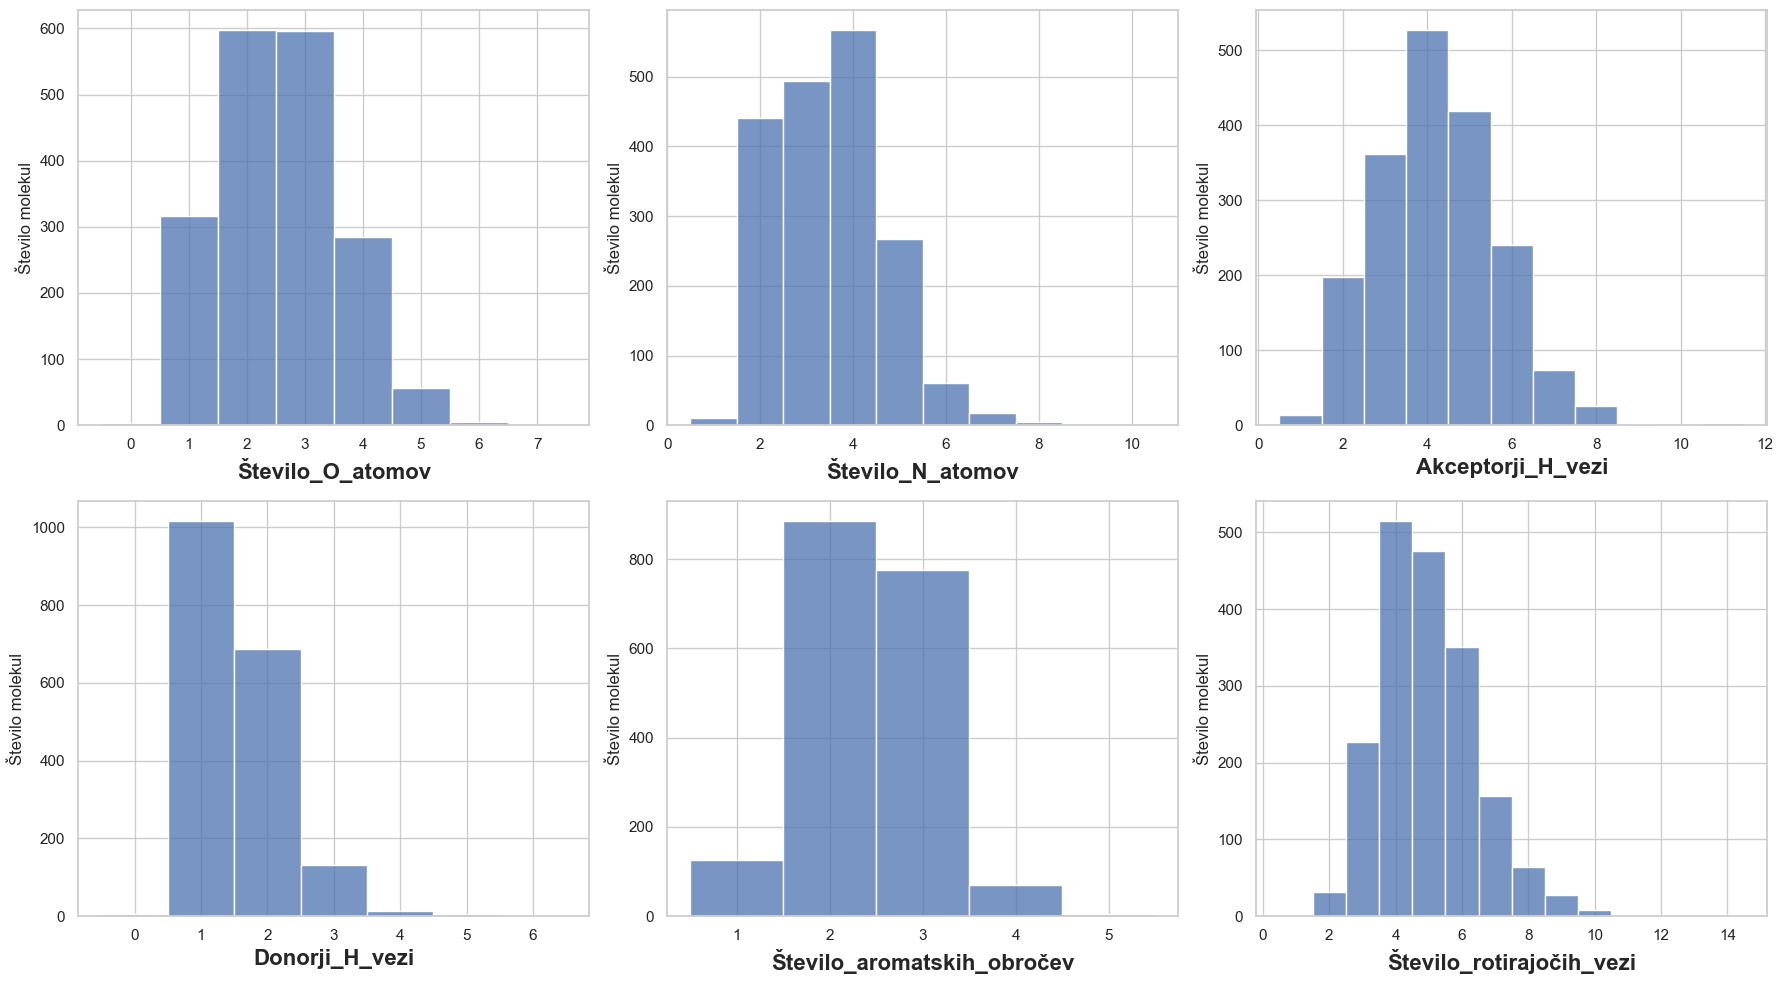

In [12]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis_svm[prop].dropna(), bins=molecules_analysis_svm[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

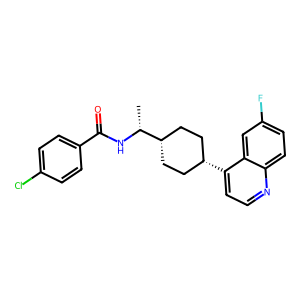

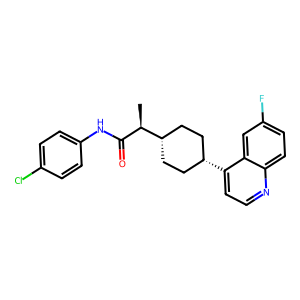

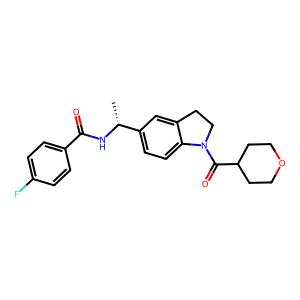

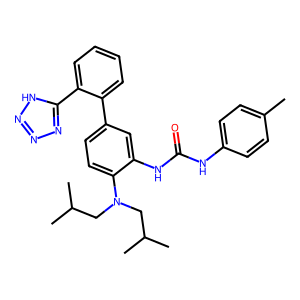

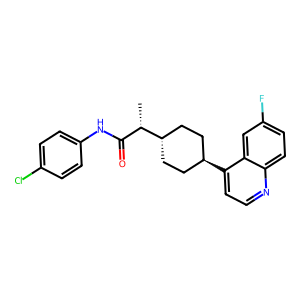

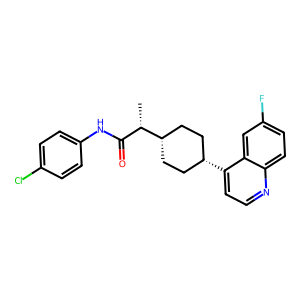

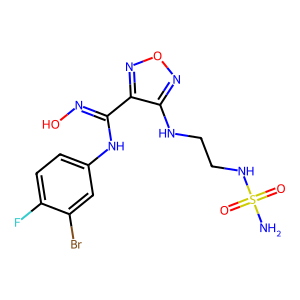

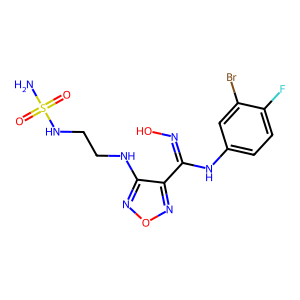

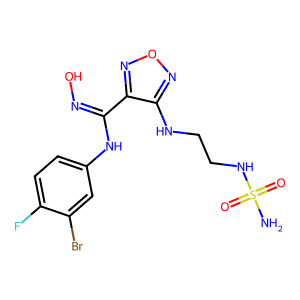

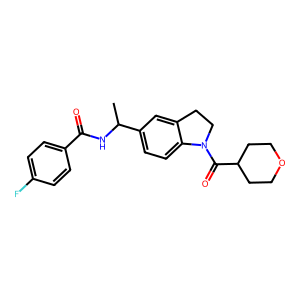

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import display, HTML

# Sample DataFrame (replace this with your actual DataFrame)
# molecules_rf = pd.DataFrame(...)

# Assuming 'molecules_rf' is already sorted by 'Predicted_Activity' and you want the top 5
top_active_molecules_svm = molecules_svm.head(10)

# Generate 2D structures and visualize them
molecule_images = []
for index, row in top_active_molecules_svm.iterrows():
    smiles = row['Smiles']
    
    # Convert SMILES to a molecule
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if the molecule is valid
    if mol is not None:
        # Draw the molecule in 2D and append to the list
        img = Draw.MolToImage(mol)
        molecule_images.append((img, smiles))  # Store the image and SMILES as a tuple
    else:
        print(f"Invalid SMILES: {smiles}")

# Display all images in the notebook with SMILES
for img, smiles in molecule_images:
    display(img)
    display(HTML(f"<h4>SMILES: {smiles}</h4>"))  # Display the SMILES below the image

## Najbolj aktivne molekule obeh modelov

In [14]:
merged_df = pd.merge(molecules_rf[['Smiles', 'Probability_Active']], 
                      molecules_svm[['Smiles', 'Probability_Active']], 
                      on='Smiles', 
                      suffixes=('_rf', '_svm'))

# Display the resulting DataFrame
merged_df

,Smiles,Probability_Active_rf,Probability_Active_svm
0,NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,0.965726,0.931809
1,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,0.963312,0.975293
2,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,0.953737,0.955743
3,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,0.953737,0.955743
4,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,0.953737,0.955743
...,...,...,...
485,CC(C)n1c2ccc(cc2oc1=O)S(=O)(=O)N1CCC(CC(=O)Nc2...,0.800493,0.863858
486,Cc1nc(C)c(s1)C(=O)N1CCCC(C1)c1ccc(cn1)C(=O)Nc1...,0.800457,0.907480
487,Cc1cc(Nc2ccc(NC(=O)Nc3ccc(F)cc3)cc2)nc(n1)N1CC...,0.800445,0.854294
488,CC(C)CCNC(=O)C1CCN(CC1)C(=O)c1nnc(s1)C(=O)Nc1c...,0.800321,0.908706


In [15]:
import pandas as pd

# Sample merged DataFrame (replace this with your actual merged DataFrame)
# merged_df = pd.DataFrame(...)

# Calculate the average of the two probability columns
merged_df['Average_Probability_Active'] = (merged_df['Probability_Active_rf'] + merged_df['Probability_Active_svm']) / 2

# Sort the DataFrame by the new average column in descending order
merged_df = merged_df.sort_values(by='Average_Probability_Active', ascending=False)
merged_df

,Smiles,Probability_Active_rf,Probability_Active_svm,Average_Probability_Active
1,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,0.963312,0.975293,0.969303
2,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,0.953737,0.955743,0.954740
3,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,0.953737,0.955743,0.954740
4,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,0.953737,0.955743,0.954740
0,NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,0.965726,0.931809,0.948767
...,...,...,...,...
461,Fc1ccc(NC(=O)N[C@H]2C[C@@H]3N(C2)C(=O)[C@H]2CC...,0.802343,0.856032,0.829188
467,Fc1ccc(NC(=S)N2CCC(CC2)NC(=O)c2ccccc2)cc1,0.801886,0.856055,0.828971
476,CCCCC(=O)N1CCCC1c1nnc(s1)C(=O)Nc1ccc(F)cc1,0.801381,0.855398,0.828390
484,COCCC(=O)N1CCC(CC1)c1ncc(C(=O)Nc2ccc(F)cc2)c(C)n1,0.800553,0.855705,0.828129


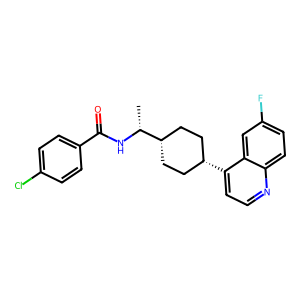

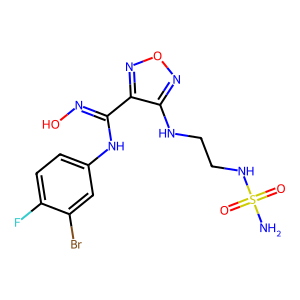

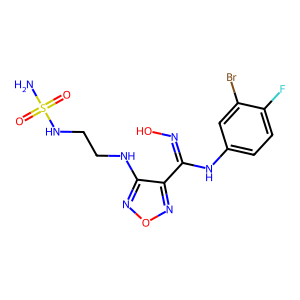

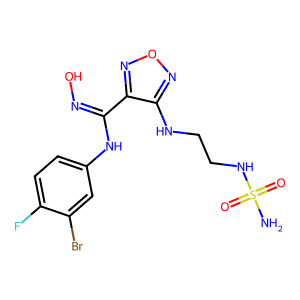

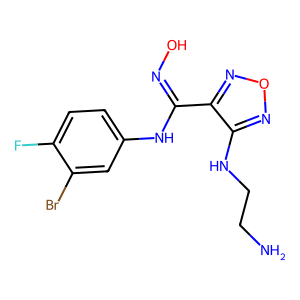

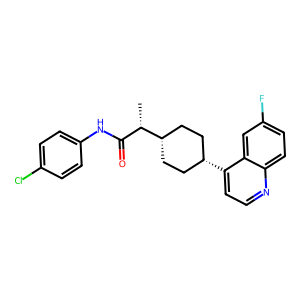

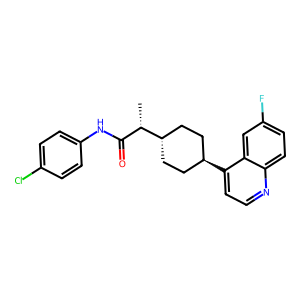

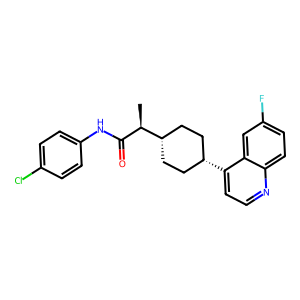

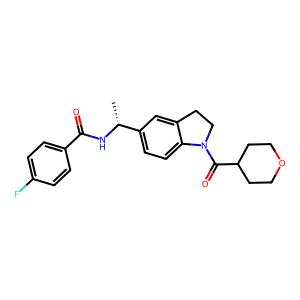

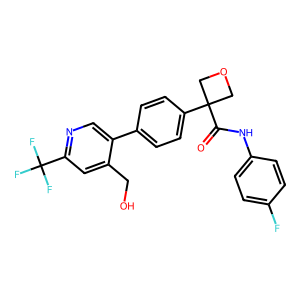

In [16]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import display, HTML

# Sample DataFrame (replace this with your actual DataFrame)
# molecules_rf = pd.DataFrame(...)

# Assuming 'molecules_rf' is already sorted by 'Predicted_Activity' and you want the top 5
merged_df = merged_df.head(10)

# Generate 2D structures and visualize them
molecule_images = []
for index, row in merged_df.iterrows():
    smiles = row['Smiles']
    
    # Convert SMILES to a molecule
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if the molecule is valid
    if mol is not None:
        # Draw the molecule in 2D and append to the list
        img = Draw.MolToImage(mol)
        molecule_images.append((img, smiles))  # Store the image and SMILES as a tuple
    else:
        print(f"Invalid SMILES: {smiles}")

# Display all images in the notebook with SMILES
for img, smiles in molecule_images:
    display(img)
    display(HTML(f"<h4>SMILES: {smiles}</h4>"))  # Display the SMILES below the image